In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Informacion del dataset
El set de datos tiene la siguiente informacion.
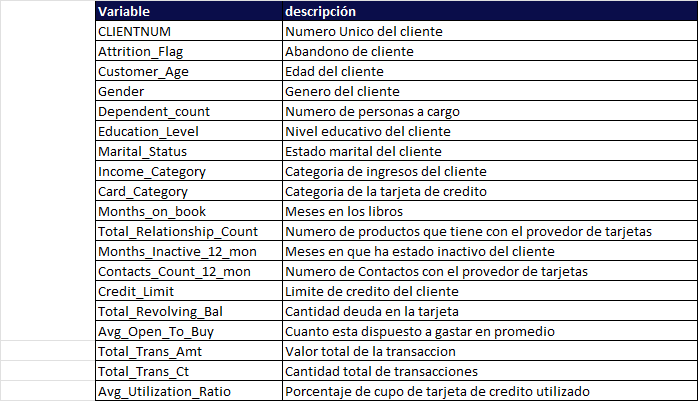

# Una primera mirada al dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Semillero/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,61.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,105.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.00


In [5]:
pd.options.display.float_format='{:,.1f}'.format

In [6]:
df.shape

(10127, 19)

# Limpieza de datos
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Errores tipográficos en el caso de las variables categóricas
5. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos.


Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de modelamiento.

# Datos faltantes
Hay un total de 10.127 datos no nulos por cada columna del set de datos, por lo que concluimos que no tenemos datos nulos.





In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.convert_dtypes().dtypes

CLIENTNUM                     Int64
Attrition_Flag               string
Customer_Age                  Int64
Gender                       string
Dependent_count               Int64
Education_Level              string
Marital_Status               string
Income_Category              string
Card_Category                string
Months_on_book                Int64
Total_Relationship_Count      Int64
Months_Inactive_12_mon        Int64
Contacts_Count_12_mon         Int64
Credit_Limit                Float64
Total_Revolving_Bal           Int64
Avg_Open_To_Buy             Float64
Total_Trans_Amt               Int64
Total_Trans_Ct                Int64
Avg_Utilization_Ratio       Float64
dtype: object

# Columnas Irrelevantes
Una columna irrelevante puede ser:

1. Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
2. Una columna categórica pero con una sóla categoria. Por ejemplo si en la columna "marital_status" solo tuviésemos el nivel "unknown".
Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
3. Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.
Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso la columna "Months_on_book" se considera no relevante para el estudio y debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [9]:
df.drop(["Months_on_book","CLIENTNUM"],axis=1,inplace=True)


In [10]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Trans_Amt             5033
Total_Trans_Ct               126
Avg_Utilization_Ratio        964
dtype: int64

In [11]:
variables_categoricas = ["Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]

for col in variables_categoricas:
  print(f'Columna {col}: {df[col].nunique()} categorias')

Columna Attrition_Flag: 2 categorias
Columna Gender: 2 categorias
Columna Education_Level: 7 categorias
Columna Marital_Status: 4 categorias
Columna Income_Category: 6 categorias
Columna Card_Category: 4 categorias


Todas las variables categoricas tienen mas de una categoria por lo que no se eliminara ninguna.

In [12]:
df.describe()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,"10,127.0","10,127.0","10,127.0","10,127.0","10,127.0","10,127.0","10,127.0","10,127.0","10,127.0","10,127.0","10,127.0"
mean,46.3,2.3,3.8,2.3,2.5,"8,632.0","1,162.8","7,469.1","4,404.1",64.9,247.3
std,8.0,1.3,1.6,1.0,1.1,"9,088.8",815.0,"9,090.7","3,397.1",23.5,274.5
min,26.0,0.0,1.0,0.0,0.0,"1,438.3",0.0,3.0,510.0,10.0,0.0
25%,41.0,1.0,3.0,2.0,2.0,"2,555.0",359.0,"1,324.5","2,155.5",45.0,0.1
50%,46.0,2.0,4.0,2.0,2.0,"4,549.0","1,276.0","3,474.0","3,899.0",67.0,132.0
75%,52.0,3.0,5.0,3.0,3.0,"11,067.5","1,784.0","9,859.0","4,741.0",81.0,463.0
max,73.0,5.0,6.0,6.0,6.0,"34,516.0","2,517.0","34,516.0","18,484.0",139.0,999.0


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

# Filas Repetidas

In [13]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (10127, 17)
Tamaño del set después de eliminar las filas repetidas: (10127, 17)


# Errores tipograficos en variables categoricas


Al revisar las categorias de cada variable descubrimos valos desconocidas "Unknown" que debemos manejar

In [14]:
for col in variables_categoricas:
  print(f'{col}\n{df[col].value_counts()}\n')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Gender
F    5358
M    4769
Name: Gender, dtype: int64

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64



Vamos a hacer una copia de mi df para no modificar el original.

In [15]:
cleaned_data = df.copy(deep=True)

Vamos a remplazar los datos cuyo valor es "Unknown" por la moda de cada columna

In [16]:
columnas=['Education_Level','Marital_Status','Income_Category']

for col in columnas:
  cleaned_data[col] = cleaned_data[col].replace("Unknown",cleaned_data[col].mode().values[0])

In [17]:
for col in columnas:
  print(f"{col}\n{cleaned_data[col].value_counts()}\n")

Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Marital_Status
Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64



# Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [18]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

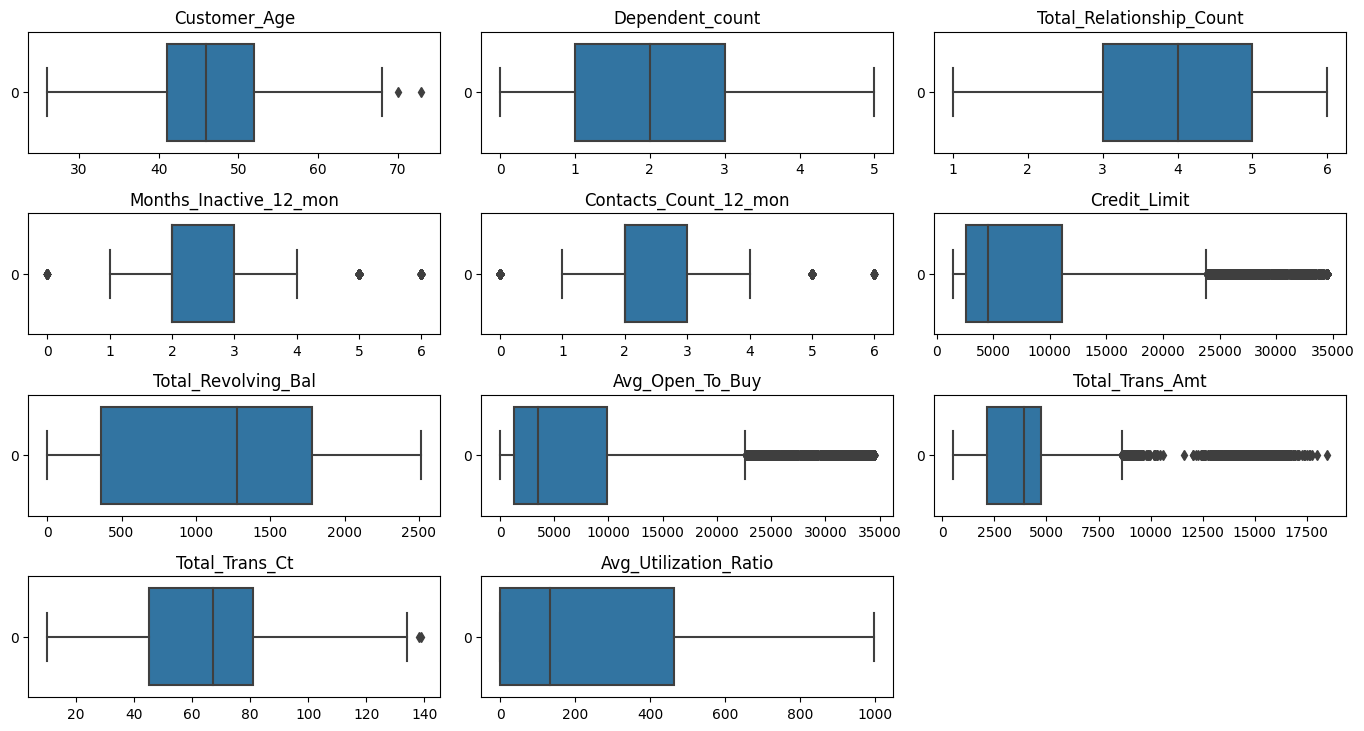

In [19]:
variables_continuas = ["Customer_Age","Dependent_count","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit",
                       "Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct","Avg_Utilization_Ratio"]

plt.figure(1 , figsize = (17 , 11))
n = 0

for i, col in enumerate(variables_continuas):
  n += 1
  plt.subplot( 5, 3 , n)
  #fig= plt.subplots( figsize=(8,1))
  #plt.subplot()
  plt.subplots_adjust(hspace =0.5 , wspace = 0.1)
  ax=  sns.boxplot(cleaned_data[variables_continuas[i]], orient='h')
  plt.title(variables_continuas[i])


# Distribucion de variables

Observemos la forma en que se distribuyen cada una de nuestras variables.

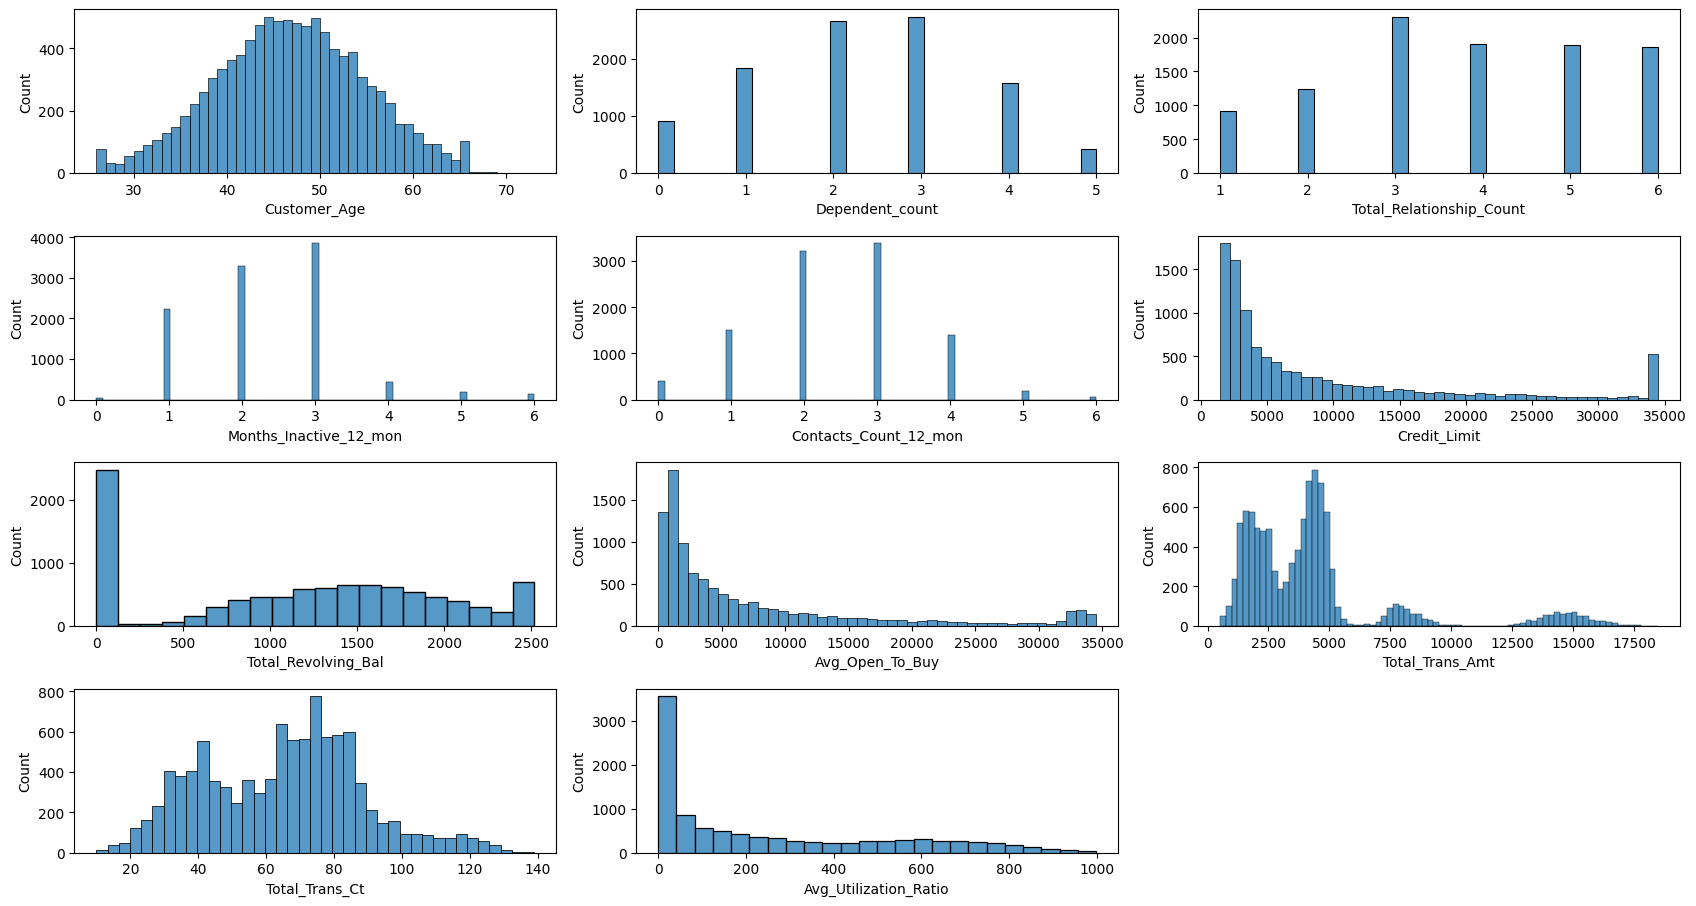

In [20]:
plt.figure(1 , figsize = (17 , 11))
n = 0
for x in variables_continuas:
    n += 1
    plt.subplot(5 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(cleaned_data[x])


plt.tight_layout()
plt.show()

Los valores atipicos que encontramos tienen sentido, no hay valores atipicos que sean necesarios su eliminacion.

Los datos estan listos para hacercele un análisis exploratorio, pero debido a que estamos preparando los datos para entrenar modelos de machine learning debemos agragar un paso mas.

Puesto que algunos modelos solo funcionan con variables numericas, debemos representar nuestras variables categoricas como variables numericas.

# Representacion de variables categoricas como variables numericas

*   Para las variables que solo tienen dos categorias las transformaremos en varibles binarias con 0 y 1.
*   Para las variables que tienen cierto Orden les asignaremos un valor de 0 hasta que se le asigne un valor a cada categoria, siguiendo el orden que tenga cada categoria.

* Para las variables no ordinales vamos a aplicar la codificacion one-hot que lo que hace es que para cada variable categórica crea una nueva columna binaria para cada categoría única en la variable original. Si tienes una variable categórica con N categorías, crearás N nuevas columnas binarias.

In [21]:
cleaned_data.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,"12,691.0",777,"11,914.0",1144,42,61.0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,"8,256.0",864,"7,392.0",1291,33,105.0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,"3,418.0",0,"3,418.0",1887,20,0.0
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,3,4,1,"3,313.0",2517,796.0,1171,20,0.8
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,"4,716.0",0,"4,716.0",816,28,0.0


En primer lugar vamos a transformar la variable Gender y Atrittion_Flag en una variable binaria, 0 para convertir Male y 1 para female. Existing Customer sera 0 y Attrited Customer por 1

In [22]:
cleaned_data.replace({"M":0,"F":1},inplace=True)
cleaned_data.replace({"Existing Customer":0,"Attrited Customer":1},inplace=True)
cleaned_data.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,5,1,3,"12,691.0",777,"11,914.0",1144,42,61.0
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,6,1,2,"8,256.0",864,"7,392.0",1291,33,105.0
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,4,1,0,"3,418.0",0,"3,418.0",1887,20,0.0
3,0,40,1,4,High School,Married,Less than $40K,Blue,3,4,1,"3,313.0",2517,796.0,1171,20,0.8
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,"4,716.0",0,"4,716.0",816,28,0.0


Vamos a obtener variables ordinales en la variable Marital_status

In [23]:
cleaned_data.replace({'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3,'$120K +':4},inplace=True)

Por ultimo vamos a obtener las variables Dummies de las variables restantes.

In [24]:
categorias = ['Education_Level','Marital_Status','Card_Category'] #A estas categorias les hallaremos las variables Dummies

for col in categorias:
  cleaned_data = pd.concat([cleaned_data,pd.get_dummies(cleaned_data[col],prefix=col)],axis=1)
  cleaned_data.drop(col,axis=1,inplace=True)

In [25]:
cleaned_data.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,2,5,1,3,"12,691.0",777,...,1,0,0,0,1,0,1,0,0,0
1,0,49,1,5,0,6,1,2,"8,256.0",864,...,0,0,0,0,0,1,1,0,0,0
2,0,51,0,3,3,4,1,0,"3,418.0",0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,1,4,0,3,4,1,"3,313.0",2517,...,1,0,0,0,1,0,1,0,0,0
4,0,40,0,3,2,5,1,0,"4,716.0",0,...,0,0,1,0,1,0,1,0,0,0


In [26]:
cleaned_data.shape


(10127, 27)

Nuestros datos estan listos para entrenar nuestros modelos.

In [27]:
ruta = "/content/drive/MyDrive/Semillero/cleaned_data.csv"
cleaned_data.to_csv(ruta,index=False)